<a href="https://colab.research.google.com/github/Regina00at/2020-01-20191068-JinaKim-Machine-Learning-Programming/blob/master/lesson4_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'
#mount google drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.collab import *
from fastai.tabular import *
#import basic library

## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [0]:
user,item,title = 'userId','movieId','title'
#declaration of the variable

In [0]:
path = untar_data(URLs.ML_SAMPLE)
path
#download sample movielens dataset

PosixPath('/root/.fastai/data/movie_lens_sample')

In [0]:
ratings = pd.read_csv(path/'ratings.csv')
#using pandas library, read rations.csv file.
ratings.head()
#head() : first few rows in pandas library

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)
#data of the movielen

In [0]:
y_range = [0,5.5]
#range of the rating score : 0 to 5.5

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)
#modeling : data of movielen in the range of [0, 5.5].
#n_factors : number of factors we will use - embedding weights of matrics

In [0]:
learn.fit_one_cycle(3, 5e-3)
#train the model for 3times

epoch,train_loss,valid_loss,time
0,1.606388,0.916328,00:01
1,0.845742,0.679085,00:00
2,0.659008,0.671165,00:00


## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [0]:
path=Config.data_path()/'ml-100k'
#set to the path we are using.
path.mkdir(parents=True, exist_ok=True)
#Add a new folder name 'ml-100k'
path
#print the path

PosixPath('/root/.fastai/data/ml-100k')

In [0]:
! mv '/content/gdrive/My Drive/fastai-v3/ml-100k/u_data.csv' '/root/.fastai/data/ml-100k'
! mv '/content/gdrive/My Drive/fastai-v3/ml-100k/u_item.csv' '/root/.fastai/data/ml-100k'
#bring two files from google drive we need.

#Since each file's name didn't include the file format, it made so many errors.
#So I changed the file name to run the code properly.

In [0]:
ratings = pd.read_csv(path/'u_data.csv', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()
#split the u_data.csv file to read properly.
#print the first few rows.

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [0]:
movies = pd.read_csv(path/'u_item.csv',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()
#split the u_item.csv file to reaad properly.
#print the first few rows.

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
len(ratings)
#how long the "ratings.csv" file is? ->100000

100000

In [0]:
rating_movie = ratings.merge(movies[[item, title]])
#merge movieID and title
rating_movie.head()
#print the first few rows

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)
#set a new databunch using the rating_movie

In [0]:
data.show_batch()
#show few of them

userId,title,target
405,Drop Zone (1994),1.0
255,Twelve Monkeys (1995),2.0
197,"Man Who Would Be King, The (1975)",3.0
871,"Young Poisoner's Handbook, The (1995)",3.0
276,Tin Cup (1996),4.0


In [0]:
y_range = [0,5.5]
#set the range : [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)
#set the learner using the rating_movie data. 

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


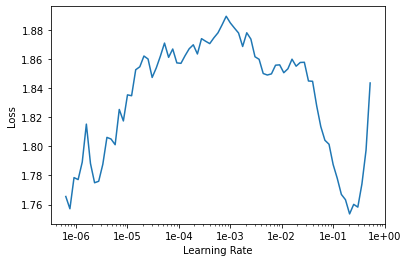

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)
#figure out the fastest model and check it as a graph

In [0]:
learn.fit_one_cycle(5, 5e-3)
#train the model for 5 times

epoch,train_loss,valid_loss,time
0,0.964598,0.938209,00:08
1,0.854798,0.893839,00:08
2,0.794038,0.836477,00:08
3,0.644007,0.818504,00:09
4,0.554840,0.815953,00:09


In [0]:
learn.save('dotprod')
#save the model as 'dotprod'

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [0]:
learn.load('dotprod');
#load the trained model

In [0]:
learn.model
#print the information of the model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

**[QUESTION]** : What is mean by this information?

In [0]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]
#classify movies by grade up to 1000
#print top ten movies

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [0]:
movie_bias = learn.bias(top_movies, is_item=True)
#bring the sorted movie list
movie_bias.shape
#the size of the list : 1000

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
#bring each movie's mean rating.
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]
#movie_ratings : mean rating value of 1000 top movies.

In [0]:
item0 = lambda o:o[0]

**[QUESTION]** What is mean by o:o[0]? How does it work as a 'key' in the below two cells?

In [0]:
sorted(movie_ratings, key=item0)[:15]
#sorted movie_ratings

[(tensor(-0.3627),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3090), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.3033),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2793), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2733), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2489), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2484), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2427), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2356), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2293), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2267), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2201), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2081), 'Sgt. Bilko (1996)', 2.5675675675675675),
 (tensor(-0.2066), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2030), 'Gr

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]
#reversely sorted movie_rations 

[(tensor(0.6059), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5873), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5743), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5394), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5353), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5328), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5113), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5099), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4870), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4825), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4718), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4679), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4668), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4653), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4537), 'Boot, Das (1981)', 4.203980099502488)]

### Movie weights

In [0]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape
#original size

torch.Size([1000, 40])

In [0]:
movie_pca = movie_w.pca(3)
movie_pca.shape
#pca : principal components analysis
#resize the embedding metrics(40->3 since 40 is too big)
#Taking layers of neural nets and checking them through PCA

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]
#backward classified by factor 0, print the first 10 rows

[(tensor(1.1028), 'Wrong Trousers, The (1993)'),
 (tensor(1.0917), 'Casablanca (1942)'),
 (tensor(1.0326), 'Lawrence of Arabia (1962)'),
 (tensor(1.0223), 'Chinatown (1974)'),
 (tensor(1.0044), 'When We Were Kings (1996)'),
 (tensor(0.9958), 'Close Shave, A (1995)'),
 (tensor(0.9724), 'Ran (1985)'),
 (tensor(0.9710), 'Third Man, The (1949)'),
 (tensor(0.9710), 'Citizen Kane (1941)'),
 (tensor(0.9311), 'Godfather, The (1972)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]
#sorted by factor 0, print the first 10 rows

[(tensor(-1.2925), 'Home Alone 3 (1997)'),
 (tensor(-1.2512), "McHale's Navy (1997)"),
 (tensor(-1.2394), 'Jungle2Jungle (1997)'),
 (tensor(-1.2155), 'Bio-Dome (1996)'),
 (tensor(-1.1946), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.1850), 'Leave It to Beaver (1997)'),
 (tensor(-1.1101), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.0909), 'Congo (1995)'),
 (tensor(-1.0750), 'Flipper (1996)'),
 (tensor(-1.0745), 'Grease 2 (1982)')]

We don't know exactly what the value means, but we can see that the classified moive_comp by factor 0 shows a very different kind of film. While backward classification films are very classic, regularly classified films are closer to time killing movies. Similarly, factor 1 classify mega-hit movies and the other. 

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]
#reversely sorted by factor 1, print the first 10 rows

[(tensor(1.1532), 'Braveheart (1995)'),
 (tensor(1.0983), 'Titanic (1997)'),
 (tensor(1.0593), 'Raiders of the Lost Ark (1981)'),
 (tensor(0.9265), 'Forrest Gump (1994)'),
 (tensor(0.9128), 'Air Force One (1997)'),
 (tensor(0.8937), "It's a Wonderful Life (1946)"),
 (tensor(0.8638), 'Independence Day (ID4) (1996)'),
 (tensor(0.8442), 'Sleepless in Seattle (1993)'),
 (tensor(0.8129), 'Pretty Woman (1990)'),
 (tensor(0.8086), 'Fugitive, The (1993)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]
#classified by factor 1, print the first 10 rows

[(tensor(-0.8324), 'Keys to Tulsa (1997)'),
 (tensor(-0.8223), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.8016), 'Trainspotting (1996)'),
 (tensor(-0.7961), 'Sweet Hereafter, The (1997)'),
 (tensor(-0.7875), 'Jude (1996)'),
 (tensor(-0.7785), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.7649), 'Cable Guy, The (1996)'),
 (tensor(-0.7615), 'Stupids, The (1996)'),
 (tensor(-0.7518), 'Clockwork Orange, A (1971)'),
 (tensor(-0.7334), 'Brazil (1985)')]

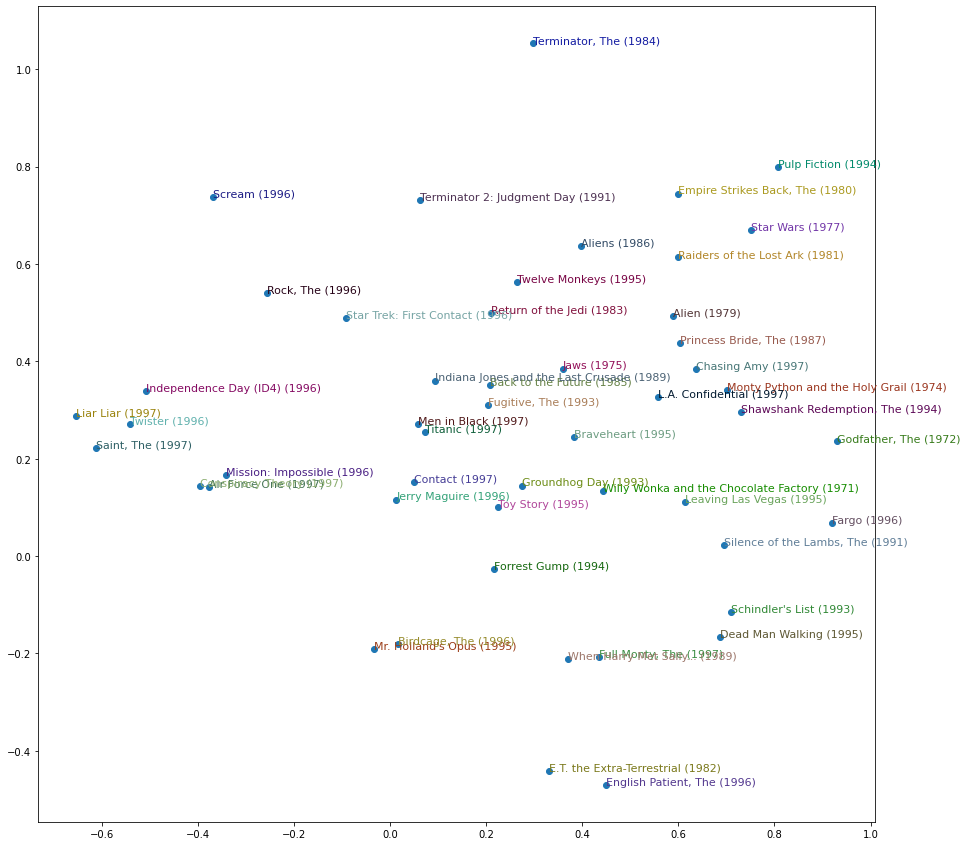

In [0]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
#bring top 50 rating movies
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
#using factor 0 and 2
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()
#classify movies by factor 0 and 2